# Operations Research and Management MGT1060
Prof. Balaji J  

---


# Railway Operations Optimization
* Yasir Ahmad (22MIA1064)
* Naveen N (22MIA1049)  
---

## Background  

Railways are the backbone of transportation systems worldwide, playing a crucial role in moving passengers and freight efficiently and economically. However, managing railway operations involves complex decision-making due to limited resources, competing priorities, and the need for cost-effectiveness.   

Operational Research (OR) provides robust tools to tackle such challenges by transforming them into structured optimization problems that can be solved mathematically.   

In this project, the focus is on applying OR techniques to real-life problems encountered in railway operations. These problems include optimizing revenue generation, minimizing transportation costs, and efficiently allocating maintenance resources. By leveraging methods such as Linear Programming (LPP), the Transportation Problem framework, and the Assignment Problem methodology, we can provide actionable insights and solutions to enhance railway operations.

## Why Operational Research for Railway Operations?  

The railway industry operates in a resource-constrained environment, where decisions often involve trade-offs between efficiency, cost, and revenue. Key areas of focus include:  

- **Resource Allocation:** Determining how to utilize limited fuel, crew hours, and track time to maximize revenue.  
- **Transportation Planning:** Allocating trains to meet city demands at minimal costs while respecting depot capacities.  
- **Workforce Optimization:** Assigning maintenance crews to tasks to minimize total time or costs.  

Operational Research provides a structured approach to address these challenges, enabling decision-makers to:  

- **Maximize Efficiency and Profitability:** Through mathematical models that optimize resource utilization.  
- **Minimize Costs:** By determining the best allocation strategies for transportation and workforce.  
- **Improve Decision-Making:** With data-driven methods that simplify complex trade-offs.

# Digital Assignment - 1

1. **Revenue Optimization (LPP and Simplex):**  
   Maximizing revenue from passenger and freight train services while constrained by fuel, crew hours, and track time.  

2. **Train Allocation (Transportation Problem):**  
   Minimizing transportation costs by allocating trains from depots to cities based on demand and capacity.  

3. **Maintenance Crew Assignment (Assignment Problem):**  
   Assigning maintenance crews to tasks in a way that minimizes total maintenance time, considering expertise and task requirements.

## 1. Revenue Optimization for Passenger and Freight Trains (Linear Programming Problem)

A **railway company** specializes in providing **local passenger and freight train services**. Each day, the railway operates under constraints related to the availability of fuel, crew hours, and track access time. The company has access to `2000` **liters of fuel**, `500` **crew hours**, and `52` **hours of track** access time each day. Operating one passenger train requires `100` liters of fuel, `50` crew hours, and `5` hours of track time, while a freight train requires `150` liters of fuel, `25` crew hours, and `3` hours of track time. The railway aims to maximize its daily revenue, with each passenger train generating `$ 500` in revenue and each freight train generating `$ 550`.

###Objective
The goal is to determine the optimal number of passenger and freight trains to operate each day to maximize total revenue, while adhering to resource constraints.

**Resources:**

| Resource          | Availability |
|-------------------|---------------|
| Fuel (liters)     | 2000          |
| Crew Hours        | 500           |
| Track Access (hrs) | 52            |

**Train Requirements:**

| Train Type   | Fuel (L) | Crew Hours | Track Time (hrs) | Revenue ($) |
|--------------|----------|-------------|-----------------|-------------|
| Passenger     | 100      | 50          | 5               | 500         |
| Freight       | 150      | 25          | 3               | 550         |

### Simplex Method

In [ ]:
from scipy.optimize import linprog

# Objective function coefficients (to be maximized)
c = [-500, -550]  # Negative because linprog minimizes

# Inequality constraint coefficients
A = [[100, 150], [50, 25], [5, 3]]

# Inequality constraint limits (RHS)
b = [2000, 500, 52]

# Bounds for decision variables (number of trains can't be negative)
x_bounds = (0, None)
y_bounds = (0, None)
bounds = [x_bounds, y_bounds]


# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')


# Print the results
print(result)


if result.success:
  print("Optimal Solution:")
  print("Number of passenger trains:", round(result.x[0]))
  print("Number of freight trains:", round(result.x[1]))
  print("Maximum Revenue: $", -round(result.fun))
else:
  print("Optimization Failed:", result.message)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -7866.666666666668
              x: [ 4.000e+00  1.067e+01]
            nit: 3
          lower:  residual: [ 4.000e+00  1.067e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  3.333e+01  0.000e+00]
                 marginals: [-2.778e+00 -0.000e+00 -4.444e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
Optimal Solution:
Number of passenger trains: 4
Number of freight trains: 11
Maximum Revenue: $ 7867


### Graphical Method

Optimal Number of Passenger Trains: 4.000000000000004
Optimal Number of Freight Trains: 10.666666666666664
Maximum Revenue Achievable: $ 7866.666666666668


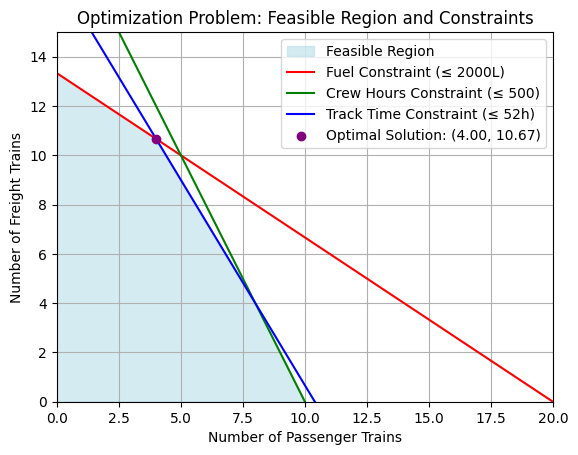

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Coefficients of the objective function (negative for maximization)
c = [-500, -550]  # Coefficients for Passenger and Freight train revenues

# Coefficients of the constraints (resource usage per train type)
A = [
    [100, 150],  # Fuel constraint
    [50, 25],    # Crew hours constraint
    [5, 3]       # Track time constraint
]

# Right-hand side of the constraints (resource availability)
b = [2000, 500, 52]

# Bounds for decision variables (number of trains, non-negative)
x_bounds = (0, None)  # No upper limit

# Define the coefficients for the constraints and objective
fuel_constraint = lambda x: (2000 - 100 * x) / 150
crew_constraint = lambda x: (500 - 50 * x) / 25
track_constraint = lambda x: (52 - 5 * x) / 3

# Bounds for plotting
x_vals = np.linspace(0, 20, 500)

# Calculate constraint lines
fuel_line = fuel_constraint(x_vals)
crew_line = crew_constraint(x_vals)
track_line = track_constraint(x_vals)

# Feasible region
plt.fill_between(x_vals, 0, np.minimum.reduce([fuel_line, crew_line, track_line]),
                 where=(fuel_line >= 0) & (crew_line >= 0) & (track_line >= 0),
                 color='lightblue', alpha=0.5, label="Feasible Region")

# Plot constraints
plt.plot(x_vals, fuel_line, label="Fuel Constraint (≤ 2000L)", color="red")
plt.plot(x_vals, crew_line, label="Crew Hours Constraint (≤ 500)", color="green")
plt.plot(x_vals, track_line, label="Track Time Constraint (≤ 52h)", color="blue")

# Solve the optimization problem using scipy

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, x_bounds], method="highs")

if result.success:
    # Optimal solution
    x_opt = result.x[0]
    y_opt = result.x[1]
    max_revenue = -result.fun  # Negate the objective value for maximization

    plt.scatter(x_opt, y_opt, color="purple", label=f"Optimal Solution: ({x_opt:.2f}, {y_opt:.2f})", zorder=5)
    print("Optimal Number of Passenger Trains:", x_opt)
    print("Optimal Number of Freight Trains:", y_opt)
    print("Maximum Revenue Achievable: $", max_revenue)
else:
    print("Optimization failed.")

# Add labels, legend, and title
plt.xlim(0, 20)
plt.ylim(0, 15)
plt.xlabel("Number of Passenger Trains")
plt.ylabel("Number of Freight Trains")
plt.title("Optimization Problem: Feasible Region and Constraints")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


---

## 2. Train Allocation and Cost Minimization (Transportation Problem)
This section models the optimal allocation of trains from different depots to various cities, minimizing transportation costs.

###Objective
Minimize the total transportation cost while meeting city demands and respecting depot capacities.

**Depots and Capacities:**

| Depot    | Capacity (Trains) |
|----------|-------------------|
| Depot A  | 100               |
| Depot B  | 150               |
| Depot C  | 200               |

**Cities and Demands:**

| City     | Demand (Trains) |
|----------|-----------------|
| City X   | 120               |
| City Y   | 180               |
| City Z   | 150               |


**Transportation Costs:**

|          | City X | City Y | City Z |
|----------|--------|--------|--------|
| Depot A  | 50     | 60     | 45     |
| Depot B  | 40     | 55     | 70     |
| Depot C  | 65     | 35     | 50     |

Optimal solution found:
Minimum transportation cost: 18700.0

Optimal Allocation:
From Depot A to City X: 0
From Depot A to City Y: 0
From Depot A to City Z: 100
From Depot B to City X: 120
From Depot B to City Y: 0
From Depot B to City Z: 30
From Depot C to City X: 0
From Depot C to City Y: 180
From Depot C to City Z: 20

Optimal Allocation:


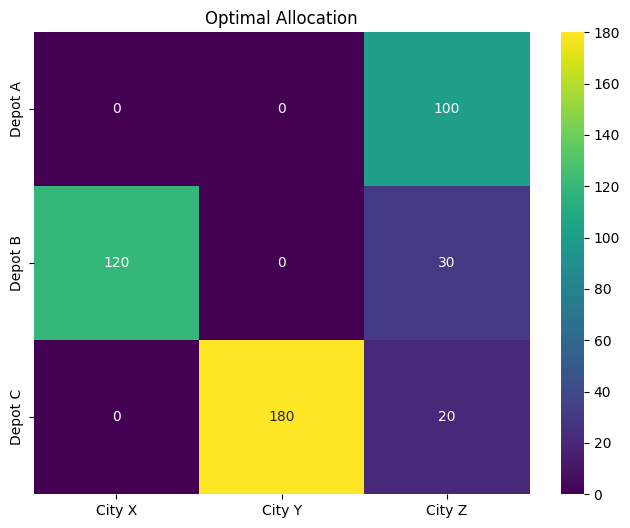

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Define the transportation problem

# Sources (e.g., train depots) and their capacities
sources = ['Depot A', 'Depot B', 'Depot C']
supply = np.array([100, 150, 200])  # Total trains available at each depot

# Destinations (e.g., cities) and their demands
destinations = ['City X', 'City Y', 'City Z']
demand = np.array([120, 180, 150])  # Total trains needed at each city

# Cost matrix (transportation cost per train from each source to each destination)
cost_matrix = np.array([
    [50, 60, 45],  # Costs from Depot A to each city
    [40, 55, 70],  # Costs from Depot B to each city
    [65, 35, 50]   # Costs from Depot C to each city
])

# Number of sources and destinations
num_sources = len(sources)
num_destinations = len(destinations)

# Convert the transportation problem into a standard linear programming form
c = cost_matrix.flatten()
A_eq = []
b_eq = []

for i in range(num_sources):
    row = [0] * (num_sources * num_destinations)
    for j in range(num_destinations):
        row[i * num_destinations + j] = 1
    A_eq.append(row)
    b_eq.append(supply[i])

for j in range(num_destinations):
    row = [0] * (num_sources * num_destinations)
    for i in range(num_sources):
        row[i * num_destinations + j] = 1
    A_eq.append(row)
    b_eq.append(demand[j])

bounds = [(0, None)] * (num_sources * num_destinations)

# Solve the linear program
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

# Print the results
if result.success:
  print("Optimal solution found:")
  print("Minimum transportation cost:", result.fun)

  allocation = result.x.reshape(num_sources, num_destinations)

  print("\nOptimal Allocation:")
  for i in range(num_sources):
      for j in range(num_destinations):
          print(f"From {sources[i]} to {destinations[j]}: {allocation[i, j]:.0f}")

else:
  print("Optimization failed:", result.message)

#Making Grid


import pandas as pd

data = {
    'City X': [0, 120, 0],
    'City Y': [0, 0, 180],
    'City Z': [100, 30, 20]
}

df = pd.DataFrame(data, index=['Depot A', 'Depot B', 'Depot C'])
print('\nOptimal Allocation:')
df

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='viridis', fmt=".0f")
plt.title('Optimal Allocation')
plt.show()


---

## 3. Assignment Problem: Track and Engine Maintenance

A railway company needs to assign `4` different maintenance crews to `4` distinct maintenance tasks related to tracks and engines. Each crew has varying levels of expertise, and each task requires specific skills. The estimated time (in hours) it takes for each crew to complete each task is shown in the cost matrix below. The company's objective is to assign each crew to a task in a way that minimizes the total time spent on all maintenance operations.
###Objective
Assign each crew to a task in a way that minimizes the total time spent on maintenance operations.

**Cost Matrix (Time in Hours):**

| Crew | Track Repair | Engine Overhaul | Signal System Upgrade | Track Inspection |
|---|---|---|---|---|
| Crew A | 10 | 12 | 15 | 8 |
| Crew B | 9 | 11 | 13 | 7 |
| Crew C | 14 | 10 | 12 | 11 |
| Crew D | 11 | 9 | 14 | 13 |

**Question:**

Formulate and solve this assignment problem to find the optimal assignment of maintenance crews to tasks, minimizing the total time required.  Present your solution as a table showing the assigned task for each crew and the corresponding time.  What is the minimum total maintenance time?

Optimal Assignment:
Crew A assigned to Task 4 (Cost: 8)
Crew B assigned to Task 1 (Cost: 9)
Crew C assigned to Task 3 (Cost: 12)
Crew D assigned to Task 2 (Cost: 9)

Minimum Total Maintenance Time: 38 hours

Assignment Grid:


<ipython-input-7-33979353e8d7>:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = assignment_grid.fillna(0)


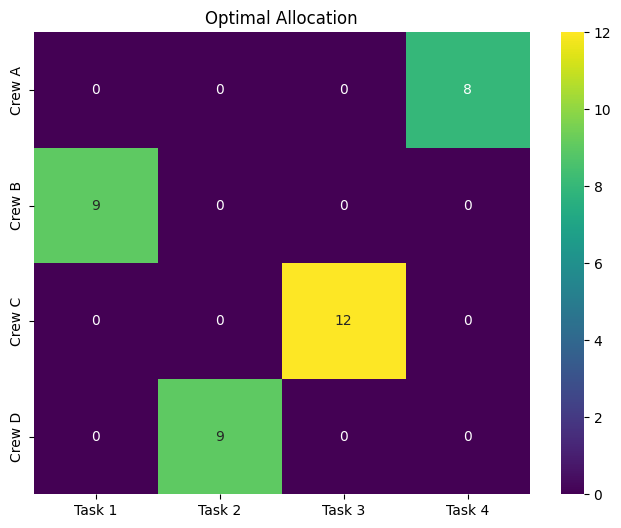

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

# Cost matrix (Time in Hours)
cost_matrix = np.array([
    [10, 12, 15, 8],
    [9, 11, 13, 7],
    [14, 10, 12, 11],
    [11, 9, 14, 13]
])

# Use the Hungarian algorithm to find the optimal assignment
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Print the results
print("Optimal Assignment:")
total_cost = 0
for i in range(len(row_ind)):
    print(f"Crew {chr(ord('A') + row_ind[i])} assigned to Task {col_ind[i] + 1} (Cost: {cost_matrix[row_ind[i], col_ind[i]]})")
    total_cost += cost_matrix[row_ind[i], col_ind[i]]

print(f"\nMinimum Total Maintenance Time: {total_cost} hours")


# Create an assignment grid (DataFrame)
import pandas as pd
crews = [f'Crew {chr(ord("A") + i)}' for i in range(4)]
tasks = [f'Task {i+1}' for i in range(4)]

assignment_grid = pd.DataFrame(index=crews, columns=tasks)

for i in range(len(row_ind)):
    assignment_grid.iloc[row_ind[i], col_ind[i]] = cost_matrix[row_ind[i], col_ind[i]]

print("\nAssignment Grid:")
#print(assignment_grid.fillna('-')) #Fill NaN values with '-'
df = assignment_grid.fillna(0)
df
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Optimal Allocation')
plt.show()


### Thank You
---